In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from google.colab import drive
import random
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Um pouco sobre gradiente descendente

O **gradiente descendente** é um algoritmo iterativo de otimização usado para encontrar o mínimo de uma função de custo, que é uma função que mede o quão bem um modelo de aprendizado de máquina se ajusta aos dados, ou seja, a função de custo é usada para calcular o nível de erro no qual o nosso algoritmo se encontra atualmente e o objetivo do gradiente descendente é encontrar o conjunto de parâmetros de um modelo que minimiza ao máximo o erro encontrado pela função de custo. O algoritmo do gradiente descendente começa com um conjunto inicial de parâmetros e, em cada iteração, calcula o gradiente da função de custo em relação a esses parâmetros. O gradiente é uma medida da direção e magnitude do aumento mais rápido da função de custo em um ponto específico. O gradiente aponta na direção de maior aumento, portanto, o gradiente negativo aponta na direção de maior diminuição. O algoritmo do gradiente descendente ajusta os parâmetros do modelo na direção oposta do gradiente (ou seja, em direção ao mínimo local), multiplicando o gradiente pelo passo de aprendizado, que é um hiperparâmetro que controla o tamanho do passo que o algoritmo dá em cada iteração. O processo é repetido até que a função de custo não possa mais ser reduzida ou até que um número máximo de iterações seja atingido. No nosso caso, iremos melhor os parâmetros encontrados pelo modelo de regressão linear do sklearn e a função de custo definida é a do erro quadrático médio. Além disso, devido a natureza da nossa função de custo, que é a de ser uma função de erro aditiva, isso nos permitirá utilizar a técnica do gradiente descendente estocástico, que calcula o gradiente (e dá um passo) para apenas um ponto por vez, evitando que seja necessário realizar demais operações e passando sobre os dados repetidamente até atingir um ponto de parada.

## Obtendo os dados

Obtendo os dados e exibindo eles na tela através do método `head()`

In [106]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gradiente-descendente/Advertising.csv')
df = df.drop("Unnamed: 0", axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Obtendo a variável explicativa e a variável resposta

Escolhendo a nossa variável resposta que no caso é a quantidade de vendas e a nossa variável explicativa que será o número de propagandas na TV. O objetivo é saber se à medida que a quantidade de propagandas exibidas nesse meio de comunicação aumentam, se também cresce o número de vendas

In [107]:
X = df.iloc[:, 0].values
X_reshaped = X.reshape(-1, 1)
Y = df["sales"].values

## Visualizando dados através de um gráfico

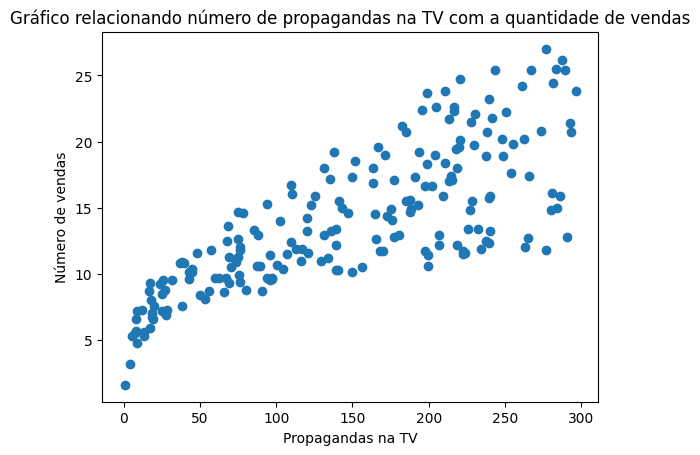

In [108]:
plt.scatter(X, Y)

plt.title("Gráfico relacionando número de propagandas na TV com a quantidade de vendas")
plt.xlabel("Propagandas na TV")
plt.ylabel("Número de vendas")
plt.show()

## Utilizando a regressão linear do sklearn

In [109]:
reg = LinearRegression()
reg.fit(X_reshaped, Y)

LinearRegression()

### Realizando predições

In [110]:
predictions = reg.predict(X_reshaped)
predictions

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

## Observando linha da regressão linear em relação ao conjunto de dados

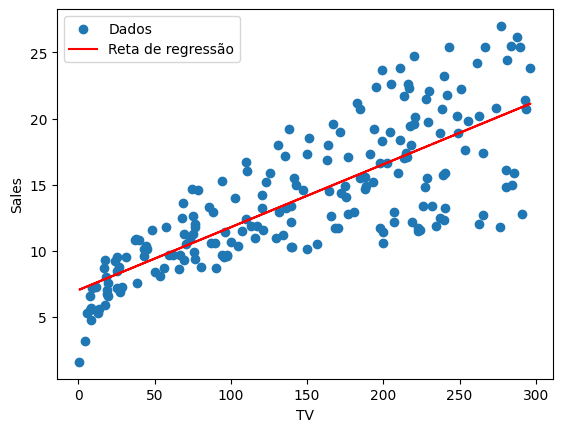

In [111]:
plt.scatter(X, Y, label="Dados")
plt.plot(X, predictions, color="red", label="Reta de regressão")
plt.legend()
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

## Exibindo na tela os coeficientes da regressão linear

In [112]:
a = reg.coef_[0]
b = reg.intercept_
print(f"Coeficiente angular = {a}")
print(f"Ponto de interseccção com o eixo y = {b}")

Coeficiente angular = 0.04753664043301975
Ponto de interseccção com o eixo y = 7.032593549127695


## Definindo funções de gradiente descendente estocástico

In [113]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.000001):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
        #print('value:', value)
        
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = np.subtract(theta, np.multiply(alpha, gradient_i))
            #theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta


In [114]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

In [115]:
def linear_f(x_i, theta):
    a, b = theta
    return a * x_i + b

def error(x_i, y_i, theta):
    return y_i - linear_f(x_i, theta)

def squared_error(x_i, y_i, theta):
    return error(x_i, y_i, theta) ** 2

def squared_error_gradient(x_i, y_i, theta):
    a, b = theta
    return [-2*(y_i - a*x_i - b)*x_i, #derivada parcial de a (theta_1)
            -2*(y_i - a*x_i - b)] #derivada parcial de b (theta_2)

## Coeficientes encontrados pelo gradiente descendente

Os coeficientes abaixo são correspondente aos que foram exibidos anteriormente, que no caso eram a = 0.04753664043301975 e b = 7.032593549127695, porém com o uso da função de gradiente descendente eles foram modificados para ter um melhor encaixe ao nosso conjunto de dados

In [116]:
theta_0 = [15, 15]
#print(foo_f(theta_0))
theta = minimize_stochastic(squared_error, squared_error_gradient, X, Y, theta_0, alpha_0=0.0000001)
print(theta)

[0.04397942 7.73307783]


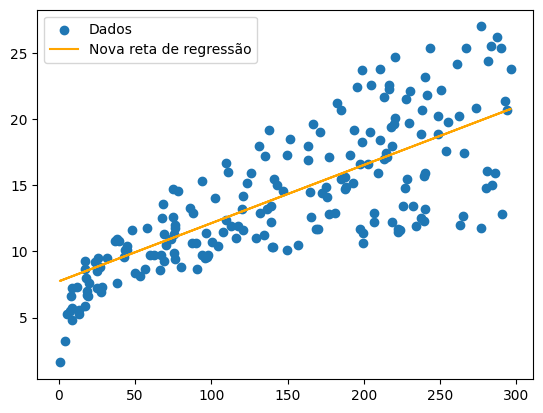

In [117]:
plt.scatter(X, Y, label="Dados")
Yhat = [linear_f(x_i, theta) for x_i in X]
plt.plot(X,Yhat, c="orange", label="Nova reta de regressão")
plt.legend()

plt.show()